In [ ]:
import tensorflow as tf
from sklearn.datasets import make_circles
X,y=make_circles(1000,noise=0.03,random_state=42)


In [ ]:
tf.random.set_seed(42)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [ ]:
model.fit(X,y,epochs=50)

Epoch 1/50
32/32 [==============================] - 1s 3ms/step - loss: 3.8131 - accuracy: 0.4570
Epoch 2/50
32/32 [==============================] - 0s 3ms/step - loss: 0.9242 - accuracy: 0.4830
Epoch 3/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7066 - accuracy: 0.4600
Epoch 4/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6961 - accuracy: 0.4610
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.4740
Epoch 6/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4580
Epoch 7/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.5020
Epoch 8/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.5020
Epoch 9/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.4880
Epoch 10/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.4510
Epoch 11/50
32/32 [

In [ ]:
model.save("model.h5")

In [ ]:
from google.colab import files
files.download("/content/model.json")

In [ ]:
import pickle
pickle.dump(model, open('model.pkl','wb'))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:


def pdb(model,X,y):

  x_min,x_max=X[:,0].min()- 0.1,X[:,0].max()+0.1
  y_min,y_max=X[:,1].min()- 0.1,X[:,1].max()+0.1
  xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),
                    np.linspace(y_min,y_max,100))
  x_in=np.c_[xx.ravel(),yy.ravel()]
  y_pred=model.predict(x_in)

  if (len(y_pred[0])>1):

     print("multiclass classification")
     y_pred=np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    print("binary classi")
    y_pred=np.round(y_pred).reshape(xx.shape)
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
  plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())


313/313 [==============================] - 0s 1ms/step
binary classi


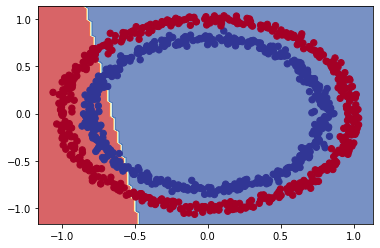

In [ ]:
pdb(model,X,y)

In [ ]:
tf.random.set_seed(42)
model2=tf.keras.Sequential([

    tf.keras.layers.Dense(1,activation="linear")
])
model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=["accuracy"])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history=model2.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9620 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8984 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8595 - accuracy: 0.4110
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8580 - accuracy: 0.4110
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8575 - accuracy: 0.4110
Epoch 11/

313/313 [==============================] - 0s 1ms/step
binary classi


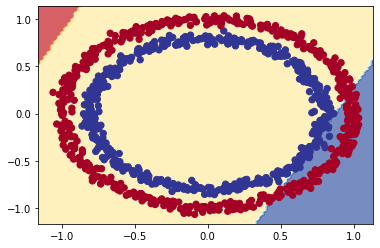

In [ ]:
pdb(model2,X,y)

In [ ]:
tf.random.set_seed(42)
model3=tf.keras.Sequential([

    tf.keras.layers.Dense(1,activation="relu")
])
model3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=["accuracy"])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history=model3.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2107 - accuracy: 0.4450
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1797 - accuracy: 0.4370
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1690 - accuracy: 0.4370
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1633 - accuracy: 0.4350
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1406 - accuracy: 0.4310
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1308 - accuracy: 0.4310
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1286 - accuracy: 0.4290
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1173 - accuracy: 0.4280
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1122 - accuracy: 0.4270
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1107 - accuracy: 0.4270
Epoch 11/

313/313 [==============================] - 1s 2ms/step
binary classi


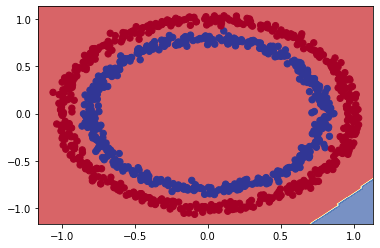

In [ ]:
pdb(model3,X,y)

In [ ]:
tf.random.set_seed(42)
model4=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1),

])
model4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=["accuracy"])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history=model4.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

313/313 [==============================] - 0s 1ms/step
binary classi


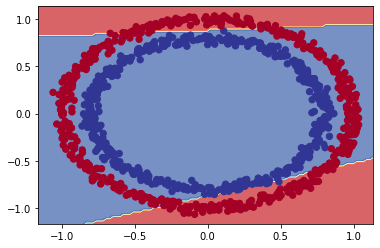

In [ ]:
pdb(model4,X,y)

In [ ]:
tf.random.set_seed(42)
model5=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid"),

])
model5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=["accuracy"])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history=model5.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/

313/313 [==============================] - 0s 1ms/step
binary classi


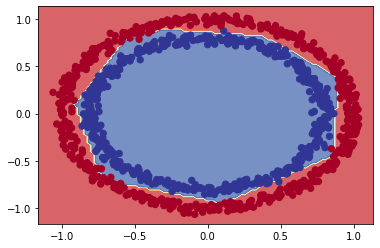

In [ ]:
pdb(model5,X,y)